# DSC510 Group Project: Ames Housing Dataset

## Authors

- Marios Theofanous
- Antonis Alexandrou
- Ioannis Demetriou

## Abstract

The housing market is a key domain within real estate and economics, where
understanding property values plays an important role for buyers, sellers, investors,
and policymakers. A complex mix of factors are influencing the prices, for example
location, physical characteristics, neighborhood amenities, and economic conditions.
Accurately estimating a property’s value can help stakeholders make informed
decisions, optimize investments, and improve affordability analyses.

In [16]:
# Importing libraries

import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

sns.set_palette("viridis")

## Dataset

The analysis will use the "Ames Housing Dataset
" dataset obtained from
[here](https://www.kaggle.com/datasets/prevek18/ames-housing-dataset)
at the time of writing. 

In this section we will load and inspect the dataset, clean it if necessary, and
prepare it for analysis by casting to appropriate types and other feature engineering.


In [2]:
# Loading the dataset

original = pd.read_csv('./data/AmesHousing.csv')
original.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object

In [5]:
original.head(100)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,533210060,160,FV,30.0,3215,Pave,Pave,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,ConLD,Normal,155000
96,97,533212010,160,FV,30.0,3182,Pave,Pave,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,151000
97,98,533212020,160,FV,24.0,2544,Pave,Pave,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,149500
98,99,533212060,160,FV,24.0,2544,Pave,Pave,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,152000


In [9]:
pd.unique(original.PID)

array([526301100, 526350040, 526351010, ..., 923400125, 924100070,
       924151050], shape=(2930,))

## Understanding the dataset

Order doesn't matter
PID is unique identified - it is the parcel ID


In [13]:
df = original.drop(columns='Order')
df.set_index('PID')

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000


## Exploratory Data Analysis

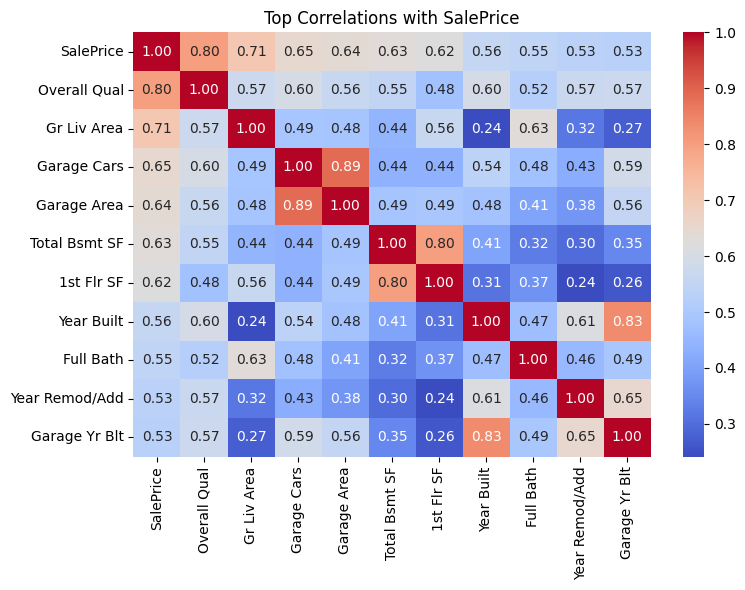

In [17]:
corr = df.corr(numeric_only=True)
top_corr = corr["SalePrice"].sort_values(ascending=False).head(11).index

plt.figure(figsize=(8,6))
sns.heatmap(df[top_corr].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top Correlations with SalePrice")
plt.tight_layout()
plt.savefig("top_corr_heatmap.png")
plt.show()

In [ ]:
sns.pairplot(df, hue="species")

### Target variable (sale price)

In [19]:
# TODO: apply df.sale_price.describe()
# TODO: plot box-plot

In [ ]:
## Dimenentionality Reduction